In [19]:
import pandas as pd
import numpy as np

In [20]:
# Load the features and target data from the uploaded files
features_file = 'features.csv'
targets_file = 'targets.csv'

# Reading the files
features_data = pd.read_csv(features_file)
targets_data = pd.read_csv(targets_file)

# Displaying the first few rows of each DataFrame
features_head = features_data.head()
targets_head = targets_data.head()

# features_head, targets_head, features_data.shape, targets_data.shape

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

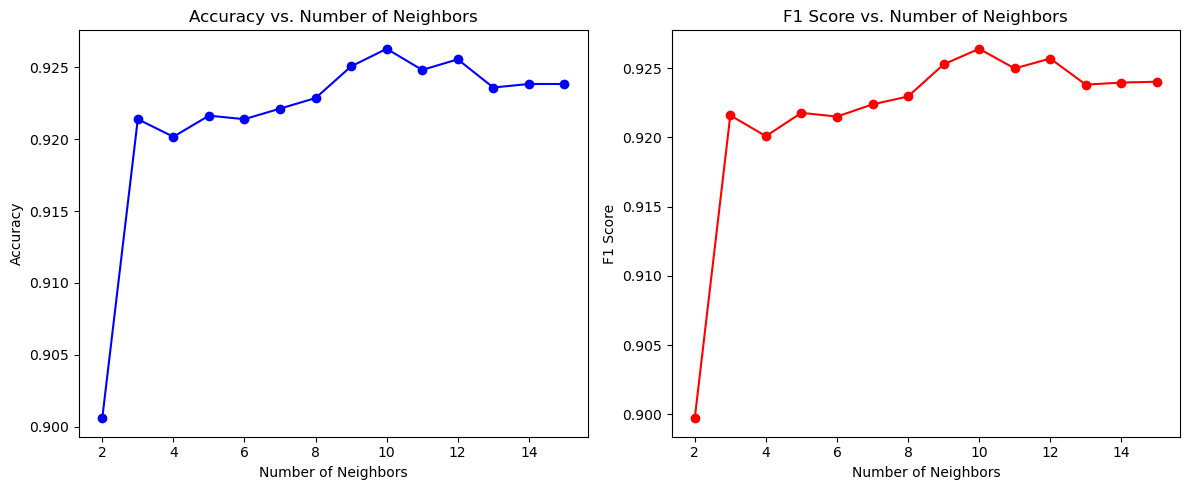

([0.9005876591576886,
  0.9214005876591577,
  0.9201762977473066,
  0.921645445641528,
  0.9214005876591577,
  0.9221351616062684,
  0.922869735553379,
  0.925073457394711,
  0.9262977473065622,
  0.9248285994123409,
  0.9255631733594515,
  0.9236043095004897,
  0.92384916748286,
  0.92384916748286],
 [0.8997175995024204,
  0.9215841737814686,
  0.920085648368977,
  0.9217674998695234,
  0.9214975744305297,
  0.9223783133350592,
  0.922948840707681,
  0.9252677824289872,
  0.9263910004936042,
  0.9249727359200273,
  0.9256885984774281,
  0.9238042893670559,
  0.9239521847621233,
  0.9240144787043527])

In [22]:
# Splitting the dataset into a 70/30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(features_data, targets_data, test_size=0.3, random_state=42)

# Standardizing the data
scaler_70_30 = StandardScaler()
X_train_70_scaled = scaler_70_30.fit_transform(X_train_70)
X_test_30_scaled = scaler_70_30.transform(X_test_30)

# Testing different numbers of neighbors from 2 to 10
neighbors_range = range(2, 16)
accuracies = []
f1_scores = []

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_70_scaled, y_train_70.values.ravel())
    y_pred_30 = knn.predict(X_test_30_scaled)

    # Calculating and storing performance metrics
    accuracies.append(accuracy_score(y_test_30, y_pred_30))
    f1_scores.append(f1_score(y_test_30, y_pred_30, average='weighted'))

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(neighbors_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(neighbors_range, f1_scores, marker='o', linestyle='-', color='r')
plt.title('F1 Score vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

accuracies, f1_scores



Judging on the data k=10 neighboorhoods are the optimum results

In [23]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_data, targets_data, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize kNN model with 10 neighbors and Euclidean distance
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9262977473065622
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.93      0.95      0.94       479
    DERMASON       0.91      0.93      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.96      0.95      0.95       619
        SIRA       0.87      0.87      0.87       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



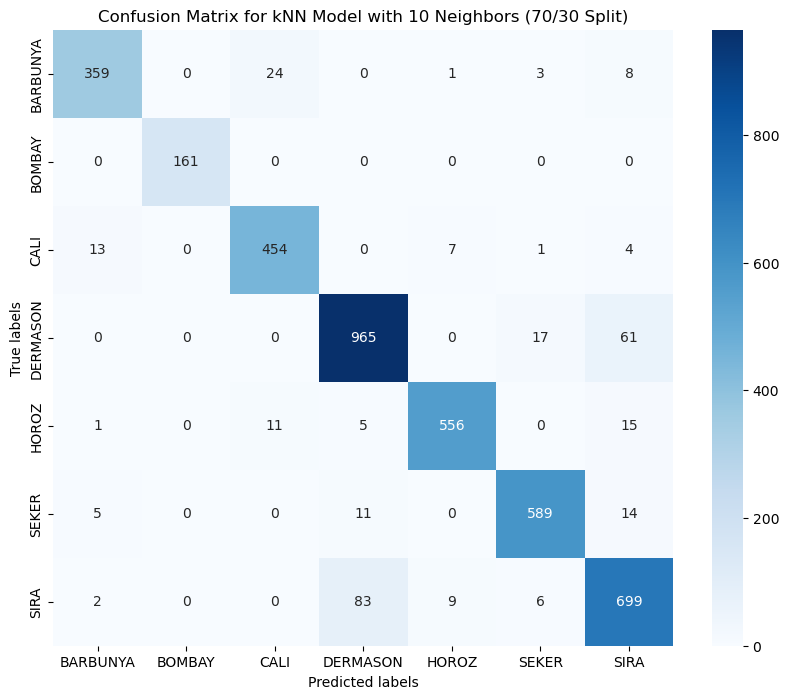

In [24]:
# Splitting the dataset into a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(features_data, targets_data, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuring and training the kNN model with 10 neighbors
knn_model_10 = KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(X_train_scaled, y_train.values.ravel())

# Making predictions
y_pred_10 = knn_model_10.predict(X_test_scaled)

# Generating the confusion matrix
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_10, annot=True, fmt='g', cmap='Blues', xticklabels=knn_model_10.classes_, yticklabels=knn_model_10.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kNN Model with 10 Neighbors (70/30 Split)')
plt.show()


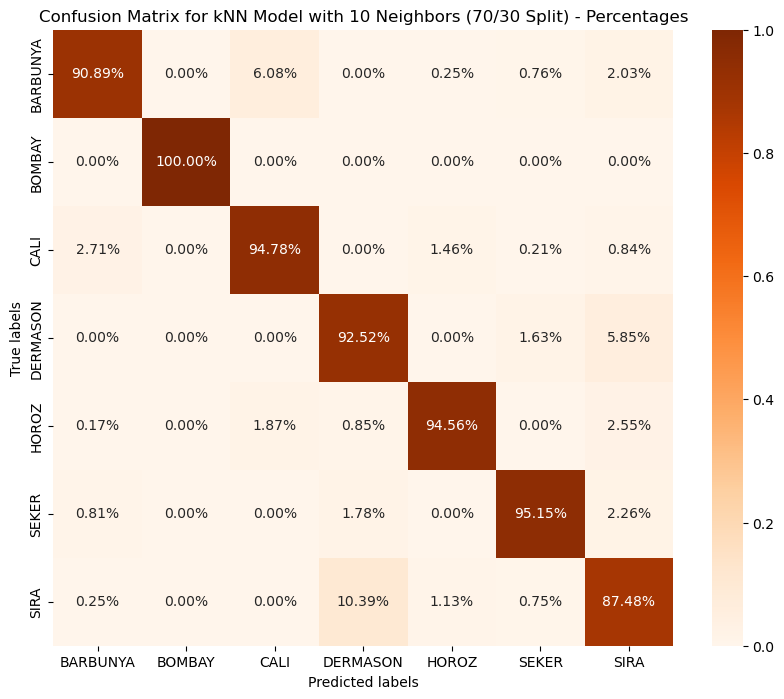

In [25]:
# Recalculating the confusion matrix and converting it to percentages
conf_matrix_percent = conf_matrix_10 / conf_matrix_10.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix with percentages and orange color map
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Oranges', xticklabels=knn_model_10.classes_, yticklabels=knn_model_10.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kNN Model with 10 Neighbors (70/30 Split) - Percentages')
plt.show()


Now lets use cross-validation with 10-fold sub groups with k=10 neighboorhoods as said in the paper and try to repeat the results in Table 11

In [1]:
# Configuring the kNN model with 10 neighbors
knn_cv_model = KNeighborsClassifier(n_neighbors=10)

# Standardizing the data
scaler_cv = StandardScaler()
features_scaled = scaler_cv.fit_transform(features_data)

# Performing 10-fold cross-validation and making predictions
y_pred_cv = cross_val_predict(knn_cv_model, features_scaled, targets_data.values.ravel(), cv=10)

# Generating the confusion matrix based on cross-validation predictions
conf_matrix_cv = confusion_matrix(targets_data, y_pred_cv)

# Extracting unique class labels from the target data for accurate labeling
sorted_unique_classes = np.sort(targets_data['Class'].unique())

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cv, annot=True, fmt='g', cmap='Reds', xticklabels=sorted_unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kNN Model with 10-Fold Cross-Validation')
plt.show()


NameError: name 'KNeighborsClassifier' is not defined

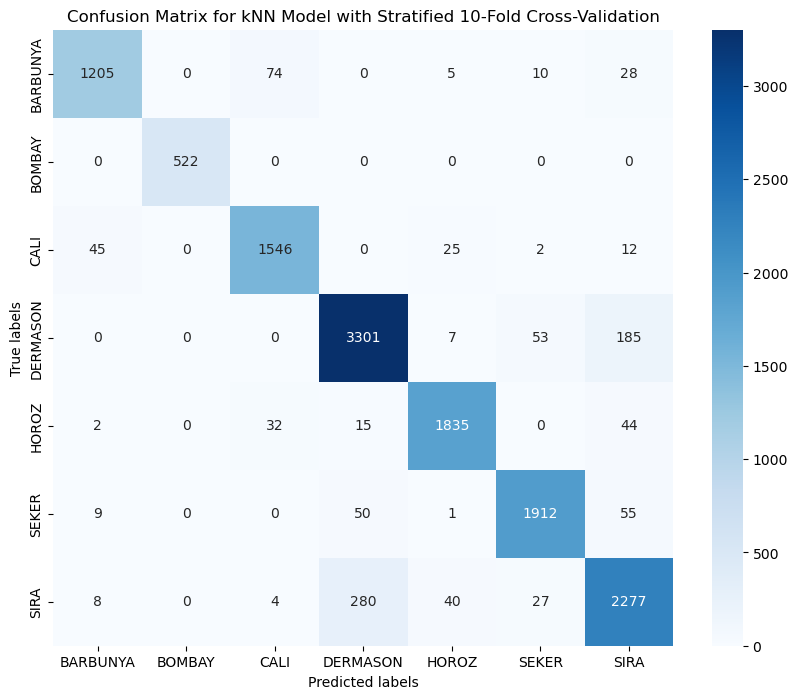

In [33]:
# Completing the code to perform cross-validation with the stratified k-fold method
# and generate a confusion matrix

# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_data)

# Set random seed for reproducibility
random_seed = 14312

# Create a StratifiedKFold instance with a fixed random seed
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_seed)

# Configure the kNN model
knn_model = KNeighborsClassifier(n_neighbors=10)

# Perform cross-validation with the stratified k-fold method
y_pred_cv = cross_val_predict(knn_model, features_scaled, targets_data.values.ravel(), cv=stratified_kfold)

# Generating the confusion matrix based on cross-validation predictions
conf_matrix_stratified_cv = confusion_matrix(targets_data, y_pred_cv)

# Extracting unique class labels from the target data for axis labels
sorted_unique_classes = np.sort(targets_data['Class'].unique())

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stratified_cv, annot=True, fmt='g', cmap='Blues', xticklabels=sorted_unique_classes, yticklabels=sorted_unique_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kNN Model with Stratified 10-Fold Cross-Validation')
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

# Creating a parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(1, 16),  # Testing 1 to 15 neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Create a new KNN model
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_70_scaled, y_train_70.values.ravel())

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score



Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'},
 0.9239005433869559)

In [37]:
# Adjusting the grid search to a smaller set of parameters
param_grid_reduced = {
    'n_neighbors': range(3, 12),  # Testing 3 to 11 neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Create a new KNN model
knn_reduced = KNeighborsClassifier()

# Create a GridSearchCV object with a smaller parameter grid
grid_search_reduced = GridSearchCV(knn_reduced, param_grid_reduced, cv=5, verbose=1, scoring='accuracy')

# Fit the model
grid_search_reduced.fit(X_train_70_scaled, y_train_70.values.ravel())

# Getting the top 10 results
top_10_results = sorted(grid_search_reduced.cv_results_['mean_test_score'], reverse=True)[:10]
top_10_params = [grid_search_reduced.cv_results_['params'][i] for i in range(len(grid_search_reduced.cv_results_['params'])) if grid_search_reduced.cv_results_['mean_test_score'][i] in top_10_results]

top_10_params, top_10_results

Fitting 5 folds for each of 54 candidates, totalling 270 fits


([{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'},
  {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'},
  {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'},
  {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'},
  {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'},
  {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}],
 [0.9239005433869559,
  0.9239005433869559,
  0.9236906247159817,
  0.9236906247159817,
  0.9235856929216482,
  0.9235856929216482,
  0.9234804857157808,
  0.9234804857157808,
  0.9229557716618055,
  0.9229557716618055])

In [46]:
random_seed = 42
# Adjusting the grid search to a smaller set of parameters
param_grid_reduced = {
    'n_neighbors': range(3, 12),  # Testing 3 to 11 neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean']  # Different distance metrics
}

# Create a new KNN model
knn_reduced = KNeighborsClassifier()

# Create a GridSearchCV object with a smaller parameter grid
grid_search_reduced = GridSearchCV(knn_reduced, param_grid_reduced, cv=5, verbose=1, scoring='precision_weighted')

# Fit the model
grid_search_reduced.fit(X_train_70_scaled, y_train_70.values.ravel())

# Getting the top 10 results
top_10_results = sorted(grid_search_reduced.cv_results_['mean_test_score'], reverse=True)[:12]
top_10_params = [grid_search_reduced.cv_results_['params'][i] for i in range(len(grid_search_reduced.cv_results_['params'])) if grid_search_reduced.cv_results_['mean_test_score'][i] in top_10_results]

top_10_params, top_10_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


([{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'},
  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'},
  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}],
 [0.924652444220382,
  0.924372373758008,
  0.9242719193703358,
  0.9240037500730314,
  0.9237207517040142,
  0.9230091798577493,
  0.9227024094403375,
  0.9226180687976386,
  0.922262

In [ ]:
# Creating a GridSearchCV object with accuracy as the scoring metric and applying cross-validation
grid_search_accuracy_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)

# Fit the model using accuracy as the metric with cross-validation
grid_search_accuracy_cv.fit(X_train_70_scaled, y_train_70.values.ravel())

# Getting the top 10 results based on accuracy
top_10_results_accuracy_cv = sorted(grid_search_accuracy_cv.cv_results_['mean_test_score'], reverse=True)[:10]
top_10_params_accuracy_cv = [grid_search_accuracy_cv.cv_results_['params'][i] for i in range(len(grid_search_accuracy_cv.cv_results_['params'])) if grid_search_accuracy_cv.cv_results_['mean_test_score'][i] in top_10_results_accuracy_cv]

top_10_params_accuracy_cv, top_10_results_accuracy_cv



#### Computationally intensive:

In [47]:
# Create a new KNN model
knn = KNeighborsClassifier()

# Creating a parameter grid
param_grid = {
    'n_neighbors': range(3, 12),  # Testing 1 to 20 neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Create a GridSearchCV object with accuracy as the scoring metric and 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Getting the top 20 results based on accuracy
top_20_results = sorted(grid_search.cv_results_['mean_test_score'], reverse=True)[:20]
top_20_params = [grid_search.cv_results_['params'][i] for i in range(len(grid_search.cv_results_['params'])) if grid_search.cv_results_['mean_test_score'][i] in top_20_results]

# Displaying the top 20 parameters and their scores
for param, score in zip(top_20_params, top_20_results):
    print(f"Parameters: {param}, Score: {score}")


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}, Score: 0.9230614071441797
Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}, Score: 0.922850110663363
Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}, Score: 0.9227469424285978
Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}, Score: 0.9226410186320069
Parameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}, Score: 0.9225349846129427
Parameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}, Score: 0.9224317061557047
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}, Score: 0.9224312652658124
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}, Score: 0.9223253414692214
Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}, Score: 0.9222217323445643
Param

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap

# Standardize the features data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_data)

# Encode the string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(targets_data.values.ravel())

# Splitting the dataset (assuming you have a train-test split)
# If you don't have a split, you can use train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Reduce the dimensionality of the data to two components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train the kNN model on the transformed data
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

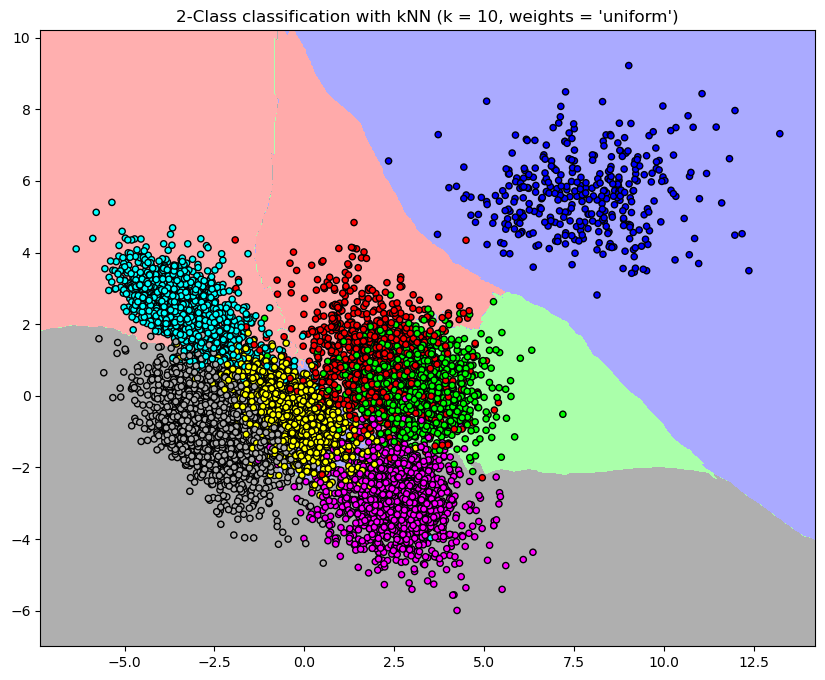

In [54]:
# Create color maps with more distinct colors
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#AFAFAF', '#AFFFAF', '#FFAFAF', '#AAAFFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#AFAFAF', '#FF00FF', '#00FFFF', '#FFFF00'])

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification with kNN (k = 10, weights = 'uniform')")
plt.show()